<a href="https://colab.research.google.com/github/geeuleeo/esercizio_Turismo/blob/main/campeggio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

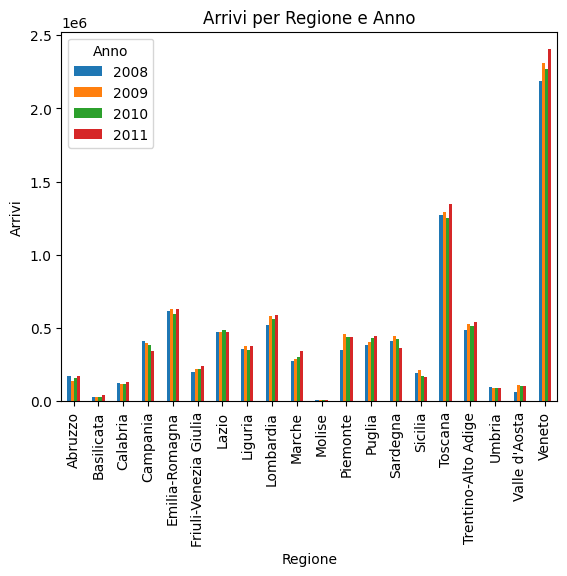

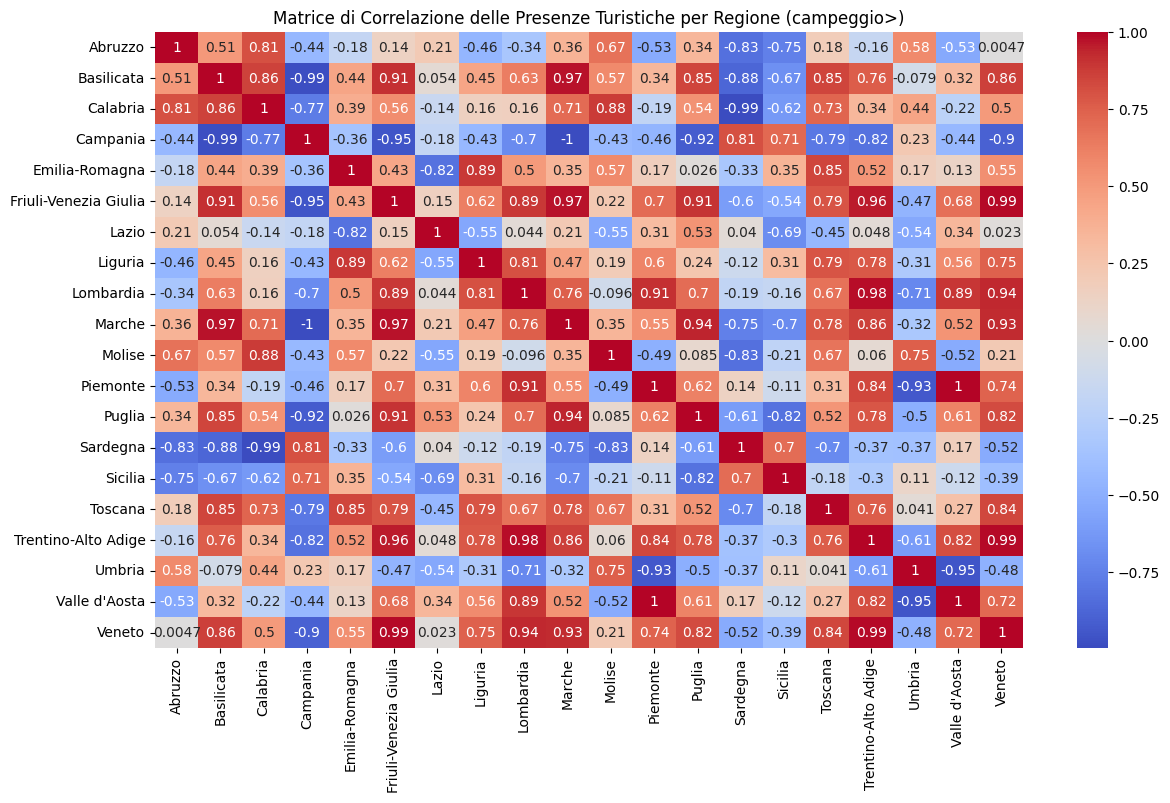

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns

df_arr_campeggio = pd.read_csv('/content/Arrivi-nei-campeggi-e-villaggi-turistici-in-italia-per-regione.csv', sep=";")
df_pre_campeggio = pd.read_csv('/content/Presenze-negli-esercizi-alberghieri-in-Italia-per-regione.csv', sep=";")

def regioni_con_arrivi_per_anno(df_arr_campeggio):
    anni = [2008, 2009, 2010, 2011]
    df_arr_campeggio = df_arr_campeggio[df_arr_campeggio['Anno'].isin(anni)]

    max_arrivi_per_anno = df_arr_campeggio.groupby('Anno')['Arrivi'].idxmax()
    regioni_max_arrivi = df_arr_campeggio.loc[max_arrivi_per_anno, 'Regione']
    arrivi_max = df_arr_campeggio.loc[max_arrivi_per_anno, 'Arrivi']

    min_arrivi_per_anno = df_arr_campeggio.groupby('Anno')['Arrivi'].idxmin()
    regioni_min_arrivi = df_arr_campeggio.loc[min_arrivi_per_anno, 'Regione']
    arrivi_min = df_arr_campeggio.loc[min_arrivi_per_anno, 'Arrivi']

    fig, axs = plt.subplots(1, 2, figsize=(14, 7))

    axs[0].bar(anni, arrivi_max, color='skyblue')
    for anno, arrivi_max, regione in zip(anni, arrivi_max, regioni_max_arrivi):
        axs[0].text(anno, arrivi_max, regione, ha='center', va='bottom')

    axs[0].set_xlabel('Anno')
    axs[0].set_ylabel('Numero di Arrivi')
    axs[0].set_title('Regioni con il maggior numero di arrivi per anno')
    axs[0].set_xticks(anni)

    axs[1].bar(anni, arrivi_min, color='tomato')
    for anno, arrivi_min, regione in zip(anni, arrivi_min, regioni_min_arrivi):
        axs[1].text(anno, arrivi_min, regione, ha='center', va='bottom')

    axs[1].set_xlabel('Anno')
    axs[1].set_ylabel('Numero di Arrivi')
    axs[1].set_title('Regioni con il minor numero di arrivi per anno')
    axs[1].set_xticks(anni)

    plt.tight_layout()
    plt.show()

#Media: La media è la somma di tutti i numeri in un set di dati diviso per il numero di elementi
#       nel set di dati. È una misura di tendenza centrale che indica il valore “tipico” in un set di dati.
#       Nel tuo caso, la media degli arrivi per ogni regione ti dà un’idea del numero medio di arrivi in
#       quella regione nel corso degli anni.
#Mediana: La mediana è il valore che divide un set di dati in due parti uguali, con metà dei dati
#         che sono inferiori alla mediana e metà dei dati che sono superiori. È una misura di tendenza centrale
#         che è utile quando i dati sono distorti o hanno valori estremi che potrebbero rendere la media non
#         rappresentativa. Nel tuo caso, la mediana degli arrivi per ogni regione ti dà un’idea del “valore tipico”
#         degli arrivi che non è influenzato dagli anni con un numero insolitamente alto o basso di arrivi.
#Deviazione standard: La deviazione standard è una misura di quanto i dati si discostano dalla media.
#                     Un valore di deviazione standard alto indica che i dati sono molto dispersi, mentre un valore basso
#                     indica che i dati sono vicini alla media. Nel tuo caso, la deviazione standard degli arrivi per ogni
#                     regione ti dà un’idea di quanto sia variabile il numero di arrivi da un anno all’altro.

# La relazione tra media, mediana e deviazione standard può aiutarti a capire la distribuzione dei tuoi dati.
# Se la media è molto diversa dalla mediana, i tuoi dati potrebbero essere distorti. Se la deviazione standard
# è alta, i tuoi dati sono molto dispersi; se è bassa, i tuoi dati sono concentrati attorno alla media.

def plot_stats(df_arr_campeggio):
    stats = df_arr_campeggio.groupby('Regione')['Arrivi'].agg(['mean', 'std', 'median'])
    stats.plot(kind='bar', subplots=True, layout=(3,1), figsize=(10,10))
    plt.tight_layout()
    plt.show()





# D’altra parte, una matrice di correlazione misura il grado in cui le serie di numeri sono correlate.
# In questo caso, stai calcolando la correlazione tra i numeri di arrivi per ogni regione nel corso
# degli anni. Un valore di correlazione vicino a 1 indica una forte correlazione positiva, cioè quando
# i numeri di arrivi aumentano per una regione, tendono ad aumentare anche per l’altra. Un valore vicino
# a -1 indica una forte correlazione negativa, cioè quando i numeri di arrivi aumentano per una regione,
# tendono a diminuire per l’altra. Un valore vicino a 0 indica una debole correlazione, cioè non c’è una
# relazione chiara tra i numeri di arrivi delle due regioni.

# Quindi, mentre i valori massimi ti danno un’idea di quale regione ha avuto il maggior
# successo in un dato anno, la matrice di correlazione ti dà un’idea di come i successi
# delle diverse regioni siano collegati tra loro. Se due regioni hanno una forte correlazione
# positiva, potrebbe significare che stanno beneficiando delle stesse tendenze turistiche
# o che stanno attuando strategie di marketing simili. Se hanno una forte correlazione
# negativa, potrebbe significare che stanno competendo per gli stessi turisti.
def plot_corr_matrix(df_arr_campeggio):

    df = df_arr_campeggio
    df_pivot = df.pivot(index='Regione', columns='Anno', values='Arrivi')
    df_pivot.plot(kind='bar', stacked=False)
    plt.title('Arrivi per Regione e Anno')
    plt.xlabel('Regione')
    plt.ylabel('Arrivi')
    plt.legend(title='Anno')

    data = df_arr_campeggio[['Anno', 'Regione', 'Arrivi']]
    data_grouped = data.groupby(['Regione', 'Anno']).sum().reset_index()
    pivot_df = data_grouped.pivot(index='Regione', columns='Anno', values='Arrivi')
    pivot_df = pivot_df.fillna(0)
    data_matrix = pivot_df.to_numpy()
    corr_matrix = np.corrcoef(data_matrix)
    plt.figure(figsize=(14, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', xticklabels=pivot_df.index, yticklabels=pivot_df.index)
    plt.title('Matrice di Correlazione delle Presenze Turistiche per Regione (campeggio>)')
    plt.show()

# I valori che ottieni da questo codice sono i coefficienti di correlazione tra gli ‘Arrivi’ e
# le ‘Presenze’ per ogni regione. Questi valori ti danno un’idea di come queste due variabili
# si muovono insieme nel tempo per ogni regione. Se la correlazione è alta, significa che quando
# gli ‘Arrivi’ aumentano, anche le ‘Presenze’ tendono ad aumentare, e viceversa. Se la correlazione
# è bassa, non c’è una relazione chiara tra le due variabili.

# Tuttavia, che la correlazione non implica causalità. Anche se due variabili sono fortemente
# correlate, non significa necessariamente che una causa l’altra. Potrebbero entrambe essere influenzate
# da un’altra variabile non considerata nell’analisi, o la correlazione potrebbe essere puramente casuale.
def plot_corr_matrix2(df_arr_campeggio, df_pre_campeggio):

    data_arr = df_arr_campeggio[['Anno', 'Regione', 'Arrivi']]
    data_arr_grouped = data_arr.groupby(['Regione', 'Anno']).sum().reset_index()
    pivot_df_arr = data_arr_grouped.pivot(index='Regione', columns='Anno', values='Arrivi')
    pivot_df_arr = pivot_df_arr.fillna(0)

    data_pre = df_pre_campeggio[['Anno', 'Regione', 'Presenze']]
    data_pre_grouped = data_pre.groupby(['Regione', 'Anno']).sum().reset_index()
    pivot_df_pre = data_pre_grouped.pivot(index='Regione', columns='Anno', values='Presenze')
    pivot_df_pre = pivot_df_pre.fillna(0)

    corr_matrix = pivot_df_arr.corrwith(pivot_df_pre, axis=1)

    plt.figure(figsize=(14, 8))
    sns.heatmap(corr_matrix.to_frame(), annot=True, cmap='coolwarm', xticklabels=['Correlazione'], yticklabels=corr_matrix.index)
    plt.title('Correlazione tra Arrivi e Presenze per Regione (campeggio)')
    plt.show()


#regioni_con_arrivi_per_anno(df_arr_campeggio)
#plot_stats(df_arr_campeggio)
plot_corr_matrix(df_arr_campeggio)
#plot_corr_matrix2(df_arr_campeggio, df_pre_campeggio)

# Nuova sezione